# Assignment 3: Bias

*Word Representations and Language Models*


Group Memr : rsAlexander Whee  1Buketak S 2Ludmila Bak 3

Similar to the weekly paper, the third assignment covers an analysis of bias in language models. Your task will be to train a Word2Vec model on sentences containing labeled entities of selected politicians and countries. Model training should be performed on (1) a set of sentences from conservative news outlets and (2) a set of sentences from a liberal news outlet. Then, your task will be to let both models print out the neighbourhoods (based on similarity) of selected entities and discuss differences/commonalities in the output.
.<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#FFF2CC;border-color:#D6B656;color:#856404"><b>How to Submit the Assignment</b>Please work on this assignment in groups of two or three. Make sure to add your names to this files header. After completion, share this assignment with me (<b>Julian Schelb - <a target="blank" href="https://www.kaggle.com/julianschelb">https://www.kaggle.com/julianschelb</a></b>) due Wednesday, 12th November, 12:00. Use the upper-right share button as instructed in the tutorial. In ILIAS, submit this notebook as response to Assignment 03. You can download this notebook using the "Download Notebook" option in the "File" menu.</div>

## Task 1: Train Two Models

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460"><b>
Step 1: Load and Process Datasetss runtime.

First, you need to add this news dataset to your notebook. Click on "+Add data" and select the dataset. This dataset includes scraped news articles annotated with the entities mentioned in them, allowing us to filter articles and extract those discussing specific politicians and countries. For this assignment, you need to work with three files:

📄 relevant_articles.json: Contains the news articles with metadata like the publishing outlet and the full article text.

📄 relevant_entities.json: Lists the named entities identified within the articles.

📄 sentences_matched_entities.json: Contains sentences from the articles that are matched with identified entities.

In the first task, you will load and filter the data. Please implement the following steps:

Load the data by reading the json files.
Filter all entries in the relevant_entities.json file containing entity labels referring to one of the politicians indicated in below list. Also define a list of 3-5 countries which you want to include in the task (Hint: you need to use the 'label' or 'norm' key (Wikipedia QID for entity label) here).
From the resulting list of entities, select all sentences containing these entities (Hint: you need to match entities and sentences based on the 'docID' and 'sendocID' key. Also remove line breaks in the sentences if necessary. This step might require ~30-45 minutes runtime.

In [2]:
# Read article data
with open("/kaggle/input/relevant_articles.json","rb") as d:
    articles = json.load(d)
#print(articles[:1])

# Read entity data (we need Wikidata QID for given words)
with open("/kaggle/input/relevant_entities.json","rb") as d:
    entities = json.load(d)

#print(entities[:10])
# Read sentence data
with open("/kaggle/input/sentences_matched_entities.json","rb") as d:
    sentences = json.load(d)
#print(sentences[:5])

In [3]:
# Pre-defined list of US politicians
persons = ['Donald Trump','Hillary Clinton','Bernie Sanders','David Cameron','Vladimir Putin']

# Define list of countries
countries = ['Argentina', 'United States', 'Russia', 'China']


In [4]:
# Load JSON data as dataframe
# Convert data to pandas DataFrames

entities_df = pd.DataFrame(entities)
sentences_df = pd.DataFrame(sentences)



# Get all entity entries whose labels match with any word from given lists
list_entities = entities_df[
                 (entities_df['label'].isin(persons)) | 
                 (entities_df['label'].isin(countries))
                ]
list_entities 


,_id,docID,senDocID,NE,sSen,eSen,covText,norm,label,conf
16,{'$oid': '5c88d7a5922cb697bf8e9290'},197728,0,PER,37,51,Vladimir Putin,Q7747,Vladimir Putin,1.000000
22,{'$oid': '5c88d7a5922cb697bf8e9296'},197728,2,LOC,7,13,Russia,Q159,Russia,0.711438
23,{'$oid': '5c88d7a5922cb697bf8e9297'},197728,3,LOC,0,6,Russia,Q159,Russia,0.711438
34,{'$oid': '5c88d7a5922cb697bf8e92a2'},197728,13,PER,2,17,Hillary Clinton,Q6294,Hillary Clinton,0.976518
35,{'$oid': '5c88d7a5922cb697bf8e92a3'},197728,14,PER,19,31,Donald Trump,Q22686,Donald Trump,0.967677
...,...,...,...,...,...,...,...,...,...,...
2244421,{'$oid': '5c88e343922cb697bf9d248f'},2128566,9,LOC,166,168,EU,Q30,United States,0.200392
2244422,{'$oid': '5c88e343922cb697bf9d2490'},2128566,10,LOC,147,149,EU,Q30,United States,0.200392
2244425,{'$oid': '5c88e343922cb697bf9d2493'},2128566,11,LOC,81,83,EU,Q30,United States,0.200392
2244427,{'$oid': '5c88e343922cb697bf9d2495'},2128566,13,LOC,114,116,EU,Q30,United States,0.200392


In [5]:
# Join on 'docID' and 'sentdocID' for a match
filtered_sentences = pd.merge(
    list_entities[['docID', 'senDocID','label']], 
    sentences_df, 
    how='inner', 
    on=['docID', 'senDocID'] 
)

filtered_sentences

,docID,senDocID,label,_id,text
0,197728,0,Vladimir Putin,1146730,From Strictly Come Dancing featuring Vladimir ...
1,197728,2,Russia,1146732,Blames Russia.
2,197728,3,Russia,1146733,Russia declares war.
3,197728,13,Hillary Clinton,1146743,• Hillary Clinton seals the Democratic preside...
4,197728,14,Donald Trump,1146744,Republican hopeful Donald Trump does well ever...
...,...,...,...,...,...
460290,2128566,9,United States,34037300,"In the past, Dominic Cummings, Vote Leave’s ca..."
460291,2128566,10,United States,34037301,He has also argued that Vote Leave is entitled...
460292,2128566,11,United States,34037302,Dilnot recently said that between 2010 and 201...
460293,2128566,13,United States,34037304,But Cummings has also challenged this methodol...


In [6]:
# Remove line breaks from sentences
filtered_sentences['sentence'] = filtered_sentences['text'].str.replace('\n', ' ', regex=False)

In [7]:
# Identify the sentences which correspond to the first 50000 
# entity mentions based on 'docID' and 'sendocID' key

# Select the first 50,000 entity mentions
selected_sentences = filtered_sentences.head(50000)

# Save the filtered sentences to a new JSON file
selected_sentences.to_json("filtered_sentences.json", orient='records', lines=True)

selected_sentences 

,docID,senDocID,label,_id,text,sentence
0,197728,0,Vladimir Putin,1146730,From Strictly Come Dancing featuring Vladimir ...,From Strictly Come Dancing featuring Vladimir ...
1,197728,2,Russia,1146732,Blames Russia.,Blames Russia.
2,197728,3,Russia,1146733,Russia declares war.,Russia declares war.
3,197728,13,Hillary Clinton,1146743,• Hillary Clinton seals the Democratic preside...,• Hillary Clinton seals the Democratic preside...
4,197728,14,Donald Trump,1146744,Republican hopeful Donald Trump does well ever...,Republican hopeful Donald Trump does well ever...
...,...,...,...,...,...,...
49995,341051,6,Bernie Sanders,3282423,But Sanders and his supporters have won someth...,But Sanders and his supporters have won someth...
49996,341051,11,Donald Trump,3282428,And in a year when Republicans are likely to n...,And in a year when Republicans are likely to n...
49997,341051,12,United States,3282429,America’s next president could have been a sel...,America’s next president could have been a sel...
49998,341051,14,Bernie Sanders,3282431,"But Sanders isn’t going to disappear, no matte...","But Sanders isn’t going to disappear, no matte..."


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460"><b>Step 2: Categorize News Articles</b> </div>

In the second step, we ask you to assign the sentences obtained in Step 1 to a "conservative" and "liberal" set of sentences. Please implement the following to pre-process the data:
*    
Based on the indicated list of conservative and liberal news outlets, assign the sentences to a "conservative" and "liberal" set of sentences* (Hi*nt: You need the 'feed' key from the article file as well as the '_id' key (article file) and 'docID' (sentences) to match sentences with article

* s*   .
Use the first 25000 entries from the "conservative" and "liberal" set of sentences.

In [8]:
# List of conservative and liberal news outlets according to Allsides.com
cons_outlets = ['telegraph','Fox']
liberal_outlets = ['guardian','cbs','HuffingtonUS','WP','HuffingtonUK','Atlantic']

In [9]:
# Load JSON data as dataframe

articles_df = pd.DataFrame(articles)

articles_df

,_id,url,title,feed,type,pub,ret,lang,refs,sum,body,text,auth
0,197727,http://www.theguardian.com/housing-network/201...,Five steps to fixing the UK housing crisis in ...,guardian,politics,{'$date': '2016-01-01T09:12:27.000+0000'},{'$date': '2016-01-01T09:27:32.000+0000'},en,[http://www.theguardian.com/commentisfree/2015...,Headlines about the utter madness of our housi...,Perhaps in years to come 2015 will be remember...,Headlines about the utter madness of our housi...,NaN
1,197728,http://www.theguardian.com/commentisfree/2016/...,That’s enough assessments of 2015. It’s time t...,guardian,politics,{'$date': '2016-01-01T09:37:06.000+0000'},{'$date': '2016-01-01T09:47:42.000+0000'},en,"[http://www.theguardian.com/business/davos, ht...",From Strictly Come Dancing featuring Vladimir ...,• Jeremy Corbyn turns down invitation to atten...,From Strictly Come Dancing featuring Vladimir ...,NaN
2,197995,http://www.theguardian.com/politics/2016/jan/0...,The paperback memoirs of Miss Rice-Davies : ar...,guardian,politics,{'$date': '2016-01-01T05:00:22.000+0000'},{'$date': '2016-01-01T22:59:09.000+0000'},en,[http://www.theguardian.com/politics/2014/dec/...,1 January 1964 : The Mandy Report turns out to...,"Miss Mandy Rice-Davies, one of 1963’s better k...",1 January 1964 : The Mandy Report turns out to...,NaN
3,198038,http://www.bbc.co.uk/news/uk-scotland-35210821...,'Very drunk' patient numbers revealed,bbc,politics,{'$date': '2016-01-02T00:42:46.000+0000'},{'$date': '2016-01-02T00:45:47.000+0000'},en,[http://www.bbc.co.uk/news/uk-scotland-35097230],Ambulances attend more than 60 incidents on av...,"Paramedics treated about 12,000 people who wer...",Ambulances attend more than 60 incidents on av...,NaN
4,198046,http://www.bbc.co.uk/news/uk-35212696#sa-ns_mc...,Littering fines set to rise to £150,bbc,politics,{'$date': '2016-01-02T04:28:41.000+0000'},{'$date': '2016-01-02T04:47:52.000+0000'},en,[http://www.telegraph.co.uk/news/politics/1206...,Penalties for people who drop litter could rea...,"According to the Daily Telegraph, the minimum ...",Penalties for people who drop litter could rea...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60790,2127922,https://www.theguardian.com/politics/2016/apr/...,Calls for ability to prosecute exploitation of...,guardian,politics,{'$date': '2016-04-19T17:15:00.000+0000'},{'$date': '2018-01-15T12:58:48.684+0000'},en,[https://www.theguardian.com/profile/rajeev-sy...,Advisory committee on business appointments ch...,Advisory committee on business appointments ch...,Advisory committee on business appointments ch...,Rajeev Syal
60791,2128566,https://www.theguardian.com/politics/2016/may/...,UK statistics chief says Vote Leave £350m figu...,guardian,politics,{'$date': '2016-05-27T12:26:05.000+0000'},{'$date': '2018-01-15T15:59:36.909+0000'},en,[https://www.theguardian.com/profile/andrewspa...,Andrew Dilnot rebukes campaign saying continue...,Andrew Dilnot rebukes campaign saying continue...,Andrew Dilnot rebukes campaign saying continue...,Andrew Sparrow @AndrewSparrow
60792,2130191,https://www.theguardian.com/politics/2016/dec/...,Ukip leader Paul Nuttall under fire over PhD c...,guardian,politics,{'$date': '2016-12-04T11:53:37.000+0000'},{'$date': '2018-01-16T03:01:52.250+0000'},en,[https://www.theguardian.com/profile/matthewta...,New leader says he did not make erroneous clai...,New leader says he did not make erroneous clai...,New leader says he did not make erroneous clai...,Matthew Taylor
60793,2151424,https://www.theguardian.com/politics/2016/sep/...,McDonnell defends calling Tory MP 'stain of ...,guardian,politics,{'$date': '2016-09-25T10:39:30.000+0000'},{'$date': '2018-01-21T10:25:57.553+0000'},en,[https://www.theguardian.com/profile/anushkaas...,Comment about Esther McVey was made in anger b...,Comment about Esther McVey was made in anger b...,Comment about Esther McVey was made in anger b...,Anushka Asthana


In [10]:

articles_df = articles_df[['_id', 'feed']]
articles_df.rename(columns={'_id': 'docID'}, inplace=True)
articles_df

/tmp/ipykernel_30/1595232606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df.rename(columns={'_id': 'docID'}, inplace=True)


,docID,feed
0,197727,guardian
1,197728,guardian
2,197995,guardian
3,198038,bbc
4,198046,bbc
...,...,...
60790,2127922,guardian
60791,2128566,guardian
60792,2130191,guardian
60793,2151424,guardian


In [11]:
# Filter sentences according to conservative and liberal leaning of articles

# Merge sentences and articles
df_final = selected_sentences.merge(articles_df, on=['docID'], how='inner')

# Identify conservative sentences & Identify liberal sentences
def filter_lib_consv(x):
    cons_outlets = ['telegraph','fox']
    liberal_outlets = ['guardian','cbs','huffingtonus','wp','huffingtonuk','atlantic']
    
    if x.lower() in cons_outlets:
        return 'conservative'
    elif x.lower() in liberal_outlets:
        return 'liberal'
    else:
        return None

    
df_final['feed'] = df_final['feed'].apply(filter_lib_consv)

# Since some journals are neither in cons_outlets nor liberal_outlets, we want remove these rows
# from the data frame.
df_final.dropna(subset=['feed'], inplace=True)
df_final

,docID,senDocID,label,_id,text,sentence,feed
0,197728,0,Vladimir Putin,1146730,From Strictly Come Dancing featuring Vladimir ...,From Strictly Come Dancing featuring Vladimir ...,liberal
1,197728,2,Russia,1146732,Blames Russia.,Blames Russia.,liberal
2,197728,3,Russia,1146733,Russia declares war.,Russia declares war.,liberal
3,197728,13,Hillary Clinton,1146743,• Hillary Clinton seals the Democratic preside...,• Hillary Clinton seals the Democratic preside...,liberal
4,197728,14,Donald Trump,1146744,Republican hopeful Donald Trump does well ever...,Republican hopeful Donald Trump does well ever...,liberal
...,...,...,...,...,...,...,...
49995,341051,6,Bernie Sanders,3282423,But Sanders and his supporters have won someth...,But Sanders and his supporters have won someth...,liberal
49996,341051,11,Donald Trump,3282428,And in a year when Republicans are likely to n...,And in a year when Republicans are likely to n...,liberal
49997,341051,12,United States,3282429,America’s next president could have been a sel...,America’s next president could have been a sel...,liberal
49998,341051,14,Bernie Sanders,3282431,"But Sanders isn’t going to disappear, no matte...","But Sanders isn’t going to disappear, no matte...",liberal


In [12]:

def create_lib_consv(df):
    liberal_sentences = []
    conservative_sentences = []
    
    for _, row in df.iterrows():
        if row['feed'] == 'liberal':
            liberal_sentences.append(row['text'])
        elif row['feed'] == 'conservative':
            conservative_sentences.append(row['text'])
    return liberal_sentences, conservative_sentences

liberal_sentences, conservative_sentences = create_lib_consv(df_final[['text', 'feed']])
print(len(liberal_sentences), len(conservative_sentences))

liberal_sentences


34282 7192


['From Strictly Come Dancing featuring Vladimir Putin to the Queen’s 90th birthday extravaganza and Jeremy Corbyn’s fourth reshuffle, here’s how 2016 panned out\n\n \n\n• Jeremy Corbyn turns down invitation to attend Davos, saying he will be oiling his bicycle that week.',
 'Blames Russia.',
 'Russia declares war.',
 '• Hillary Clinton seals the Democratic presidential nomination on Super Tuesday.',
 'Republican hopeful Donald Trump does well everywhere except Texas, where he is dismissed as too liberal.',
 'He is immediately named as a contestant in the autumn series of Strictly Come Dancing, alongside Ed Balls, Fearne Cotton, José Mourinho, Katherine Jenkins, Tomasz Schafernaker, Vladimir Putin, Monsignor Bruce Kent, Baroness Mone, the bass player from Ultima Thule, Chris Robshaw, someone from EastEnders, someone else from Coronation Street, Oliver Letwin, a random boxer and Tokyo Sexwale.',
 'David Cameron is so annoyed he announces the EU referendum will be a week on Thursday, back

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460"><b>Step 3: Model Training</b> </div>

The third step covers model training. Train **two** Word2Vec models using the datasets from Step 2, one for each subset of sentences (conservative and liberal). Please follow these steps to train a model:

1. Create an iterator class for data loading, following the instructions in the [Training your own model](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#training-your-own-model) section of the Gensim documentation. This class should accept a subset of sentences as input and return one sentence per iteration.
2. Train two Word2Vec models for 40 epochs each, one on the conservative and and one of the liberal subsets of the sentences using default parameters. This training might take approximately 15 minutes per subset.
3. Track the training loss per epoch using [callbacks](https://radimrehurek.com/gensim/models/callbacks.html). Use [model.get_latest_training_loss()](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec.get_latest_training_loss) to monitor cumulative training loss.
4.  Plot the training loss per epoch for each subset.
_Tipp: Save each model to your input folder after training. You can then reload the models directly from the input folder when reopening the notebook, avoiding the need for re-training._

In [14]:
# Create iterator class
class MyCorpus():
    """An iterator that yields sentences (lists of str)."""
    def __init__(self, articles):
        self.articles = articles
    
    def __iter__(self):
        for article in self.articles:
            # assume there's one document per line, tokens separated by whitespace, 
            # to handle punctuation and case normalization.
            yield utils.simple_preprocess(article)
            


In [15]:
from gensim.models.callbacks import CallbackAny2Vec
#chatgpt
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        current_loss = model.get_latest_training_loss()
        epoch_loss = current_loss - self.loss_to_be_subed
        self.loss_to_be_subed = current_loss

        print(f"Epoch {self.epoch + 1}: Loss = {epoch_loss}")
        self.epoch += 1
        
    

In [16]:
# Train conservative model
conservative_corpus = MyCorpus(conservative_sentences)

# Create model object
con_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4, sg=0) 

# Building the vocabulary from our dataset
 
con_model.build_vocab(conservative_corpus)
# Train the model
loss_callback = callback()
con_model.train(conservative_corpus, total_examples=con_model.corpus_count, epochs=40, compute_loss=True, callbacks=[loss_callback])

Epoch 1: Loss = 284869.5
Epoch 2: Loss = 232136.8125
Epoch 3: Loss = 217494.5625
Epoch 4: Loss = 208380.75
Epoch 5: Loss = 144442.75
Epoch 6: Loss = 186155.125
Epoch 7: Loss = 181455.75
Epoch 8: Loss = 171351.25
Epoch 9: Loss = 183147.75
Epoch 10: Loss = 159741.0
Epoch 11: Loss = 153301.0
Epoch 12: Loss = 145320.25
Epoch 13: Loss = 140686.5
Epoch 14: Loss = 137769.25
Epoch 15: Loss = 85489.25
Epoch 16: Loss = 117980.25
Epoch 17: Loss = 93356.0
Epoch 18: Loss = 123453.25
Epoch 19: Loss = 121133.25
Epoch 20: Loss = 120475.25
Epoch 21: Loss = 105845.75
Epoch 22: Loss = 97172.75
Epoch 23: Loss = 112942.75
Epoch 24: Loss = 101585.5
Epoch 25: Loss = 103308.0
Epoch 26: Loss = 108563.75
Epoch 27: Loss = 106983.0
Epoch 28: Loss = 107668.5
Epoch 29: Loss = 87440.75
Epoch 30: Loss = 99296.75
Epoch 31: Loss = 91516.0
Epoch 32: Loss = 83176.5
Epoch 33: Loss = 98807.5
Epoch 34: Loss = 89251.5
Epoch 35: Loss = 80387.0
Epoch 36: Loss = 65009.5
Epoch 37: Loss = 95893.0
Epoch 38: Loss = 86997.5
Epoch 39

(6826938, 8816360)

In [17]:
# Train conservative model
liberal_corpus = MyCorpus(liberal_sentences)

# Create model object
lib_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4, sg=0) 

# Building the vocabulary from our dataset
 
lib_model.build_vocab(liberal_corpus)
# Train the model
loss_callback = callback()
lib_model.train(liberal_corpus, total_examples=lib_model.corpus_count, epochs=40, compute_loss=True, callbacks=[loss_callback])

Epoch 1: Loss = 1064088.625
Epoch 2: Loss = 790463.125
Epoch 3: Loss = 698252.75
Epoch 4: Loss = 729100.75
Epoch 5: Loss = 692678.5
Epoch 6: Loss = 552737.25
Epoch 7: Loss = 464065.5
Epoch 8: Loss = 476996.5
Epoch 9: Loss = 554012.0
Epoch 10: Loss = 543562.5
Epoch 11: Loss = 416954.5
Epoch 12: Loss = 507034.5
Epoch 13: Loss = 522515.5
Epoch 14: Loss = 291957.0
Epoch 15: Loss = 430427.0
Epoch 16: Loss = 386353.0
Epoch 17: Loss = 419919.0
Epoch 18: Loss = 211223.0
Epoch 19: Loss = 253605.0
Epoch 20: Loss = 433286.0
Epoch 21: Loss = 381625.0
Epoch 22: Loss = 236461.0
Epoch 23: Loss = 406242.0
Epoch 24: Loss = 415975.0
Epoch 25: Loss = 232888.0
Epoch 26: Loss = 410003.0
Epoch 27: Loss = 248342.0
Epoch 28: Loss = 403723.0
Epoch 29: Loss = 269101.0
Epoch 30: Loss = 361541.0
Epoch 31: Loss = 398229.0
Epoch 32: Loss = 309780.0
Epoch 33: Loss = 392153.0
Epoch 34: Loss = 270710.0
Epoch 35: Loss = 395732.0
Epoch 36: Loss = 241391.0
Epoch 37: Loss = 313548.0
Epoch 38: Loss = 319864.0
Epoch 39: Los

(29974041, 38703480)

## Task 2: Compare Both Models

We want to explore whether there are differences between the conservative and liberal model in how they represent political figures and countries. By analyzing the k-nearest neighbors (the k most similar words based on cosine similarity) for each politician or country in our list, we can assess the influence of the training dataset on these models.

Please follow these step

**
Find the k-Nearest Nei**bor**s: For each politician/country in our list, identify the k-nearest neighbors (try k=20 or k=30) using cosine similarity in both mols

de**ls.
Display Neare Neig*** Find the k-Nearest Ngheibors:** For each politician/country in our list, identify the k-nearest neighbors (try k=20 or k=30) using cosine similarity in both mode

**Display Nearest Neighbors:** For each politician/country, display the k-nearest neighbors in a table, ranked in descending order by similarity.hbors: For each politician/country, display the k-nearest neighbors in a table, ranked in descending order by mila
r****ity.
Visuize wi****th PCA: To better interpret the embeddings, create a scatter plot. Use PCA to reduce dimensionality to two components and plot each politician with their k-nearest neighbors. Ideally, create a separate plot for eacpolit

i****cian.
Interet the ****Results: Observe whether there are noticeable differences between the conservative and liberal models. If so, briefly describe these differences. If not, discuss any potential limitations of this approach.

In [18]:
# lowercase lists
persons_l = ['trump','clinton','sanders','cameron','putin']

countries_l = ['argentina', 'usa', 'russia', 'china']

# Get k-nearest neighbors
# Function to get k-nearest neighbors
def get_nearest_neighbors(model, word_list, k=20):
    results = {}
    for word in word_list:
        try:
            neighbors = model.wv.most_similar(word, topn=k)
            results[word] = neighbors
        except KeyError:
            print(f"'{word}' not found in the vocabulary.")
    return results

# Get k-nearest neighbors for both models
k = 20

conservative_neighbors = get_nearest_neighbors(con_model, persons_l + countries_l, k)
liberal_neighbors = get_nearest_neighbors(lib_model, persons_l + countries_l, k)

# Function to display neighbors in a DataFrame
def display_neighbors(neighbors, title):
    tables = []
    for word, neighbors_list in neighbors.items():
        df = pd.DataFrame(neighbors_list, columns=['Neighbor', 'Similarity'])
        df.insert(0, 'Target', word)
        tables.append(df)
    final_table = pd.concat(tables, ignore_index=True)
    print(f"\n--- {title} ---")
    print(final_table)
    return final_table

# Display neighbors for conservative and liberal models
conservative_table = display_neighbors(conservative_neighbors, "Conservative Model Neighbors")
liberal_table = display_neighbors(liberal_neighbors, "Liberal Model Neighbors")


--- Conservative Model Neighbors ---
    Target    Neighbor  Similarity
0    trump     whining    0.510970
1    trump      kasich    0.466244
2    trump        cruz    0.447403
3    trump  republican    0.443591
4    trump    trailing    0.428486
..     ...         ...         ...
175  china        isil    0.571062
176  china     patrols    0.570085
177  china   cosmetics    0.564821
178  china    confront    0.559918
179  china        rock    0.558230

[180 rows x 3 columns]

--- Liberal Model Neighbors ---
    Target       Neighbor  Similarity
0    trump        sanders    0.589608
1    trump        clinton    0.521798
2    trump           cruz    0.477408
3    trump         kasich    0.477091
4    trump            gop    0.465961
..     ...            ...         ...
175  china          bases    0.432955
176  china         africa    0.427845
177  china      countries    0.426586
178  china  biotechnology    0.419503
179  china       slowdown    0.418601

[180 rows x 3 columns]


In [19]:
# Function to visualize neighbors with PCA
def visualize_neighbors_pca(model, neighbors_dict, title):
    pca = PCA(n_components=2)
    
    for word, neighbors in neighbors_dict.items():
        # Collect word vectors for the target and its neighbors
        words = [word] + [neighbor[0] for neighbor in neighbors]
        vectors = [model.wv[w] for w in words]
        
        # Reduce dimensions with PCA
        reduced_vectors = pca.fit_transform(vectors)
        
        # Plot
        plt.figure(figsize=(10, 8))
        plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue', label='Neighbors')
        plt.scatter(reduced_vectors[0, 0], reduced_vectors[0, 1], c='red', label='Target', marker='x', s=100)
        
        # Annotate points
        for i, word in enumerate(words):
            plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
        
        plt.title(f"{title}")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend()
        plt.grid(True)
        plt.show()


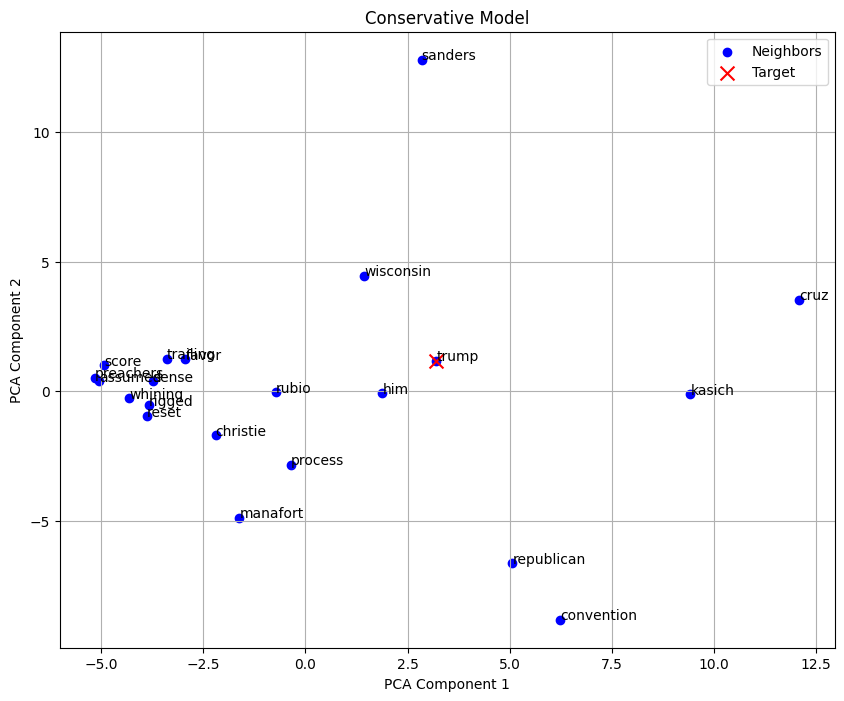

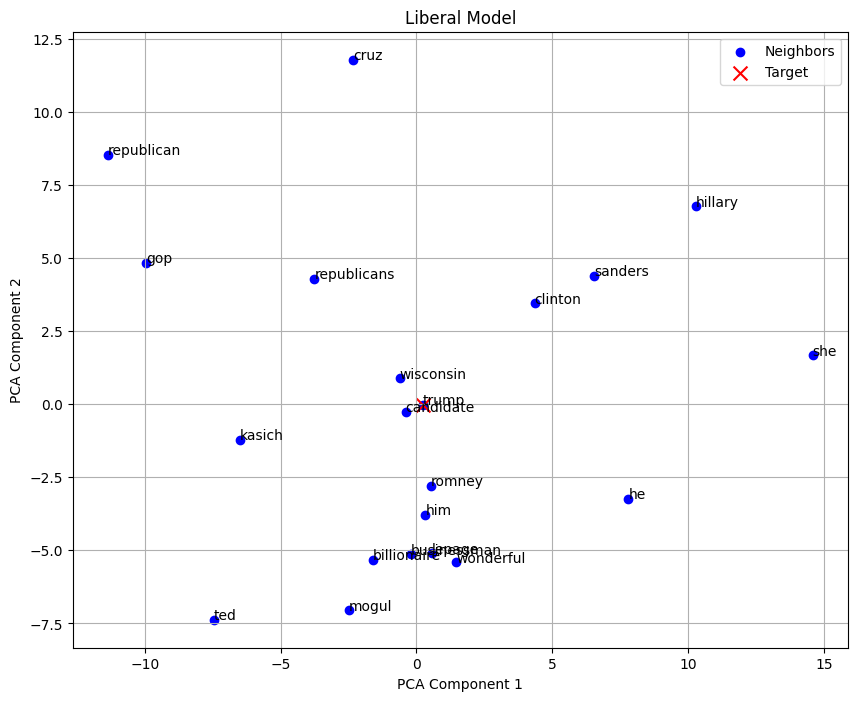

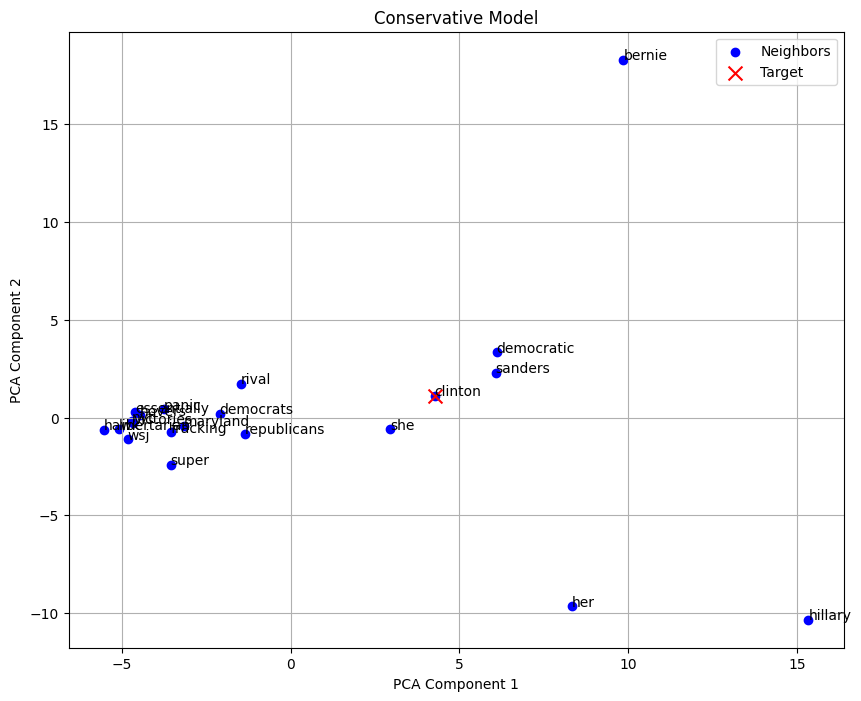

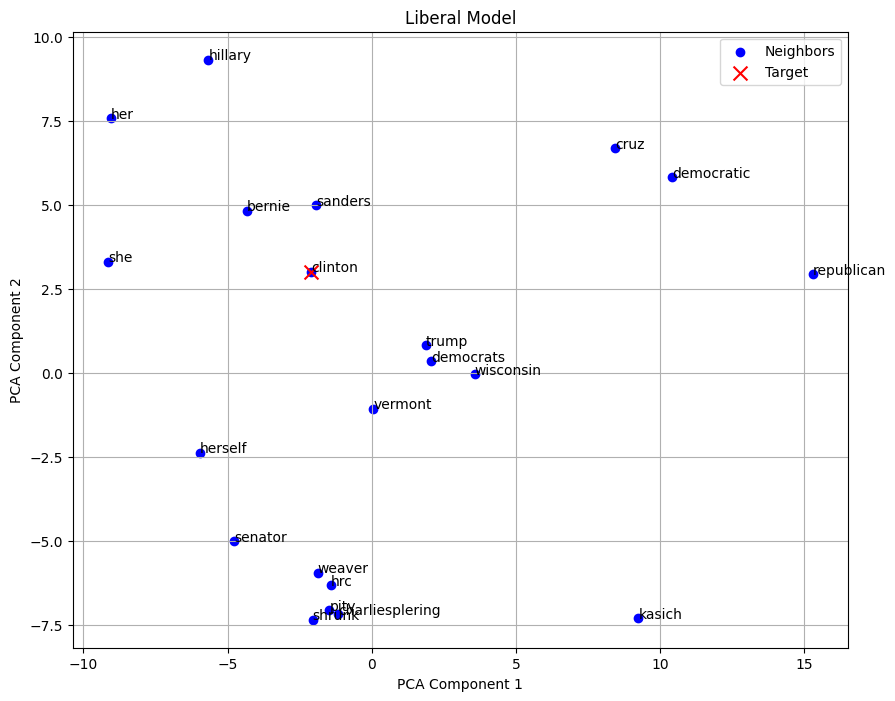

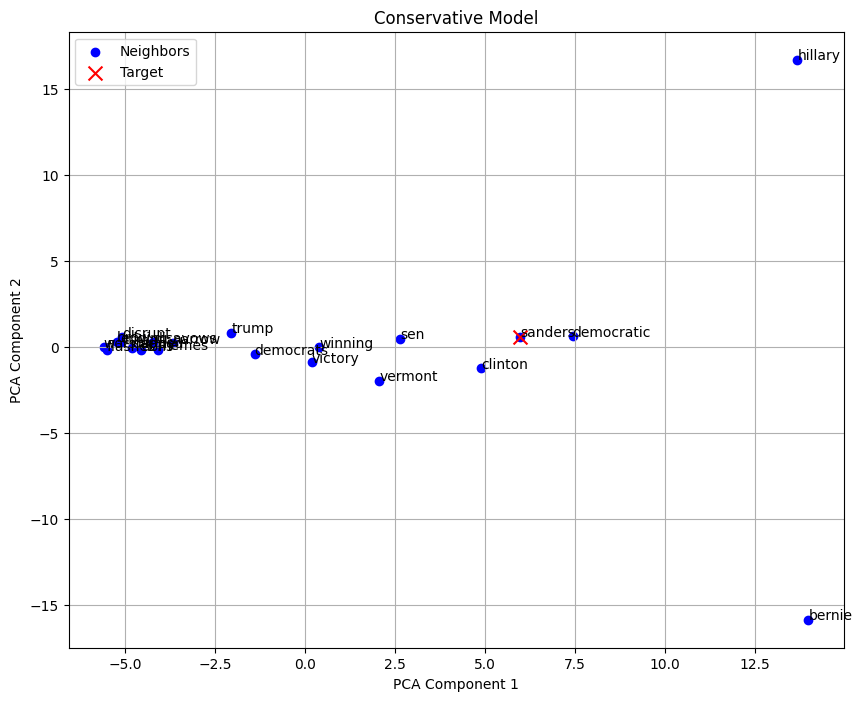

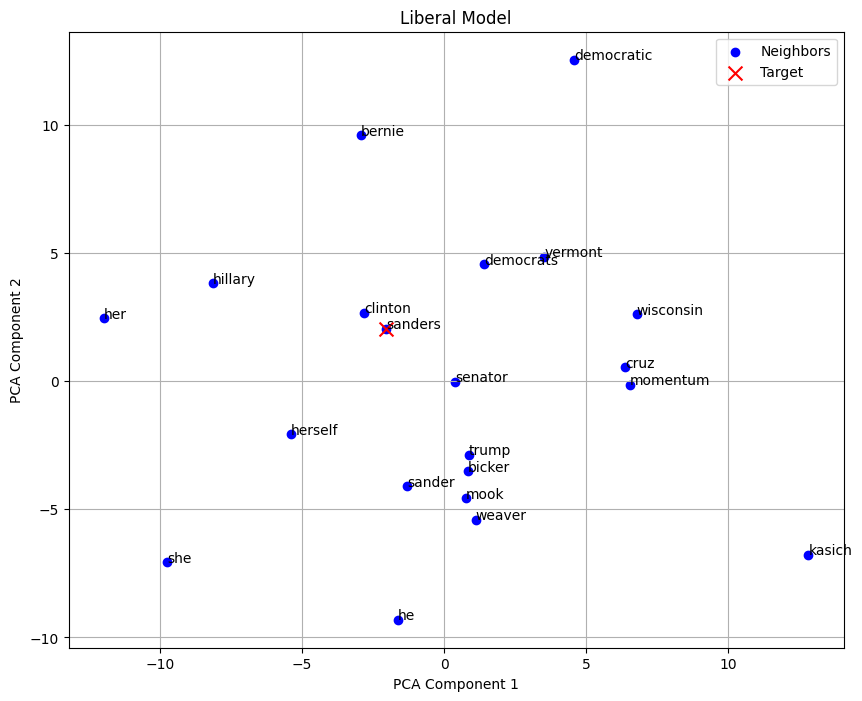

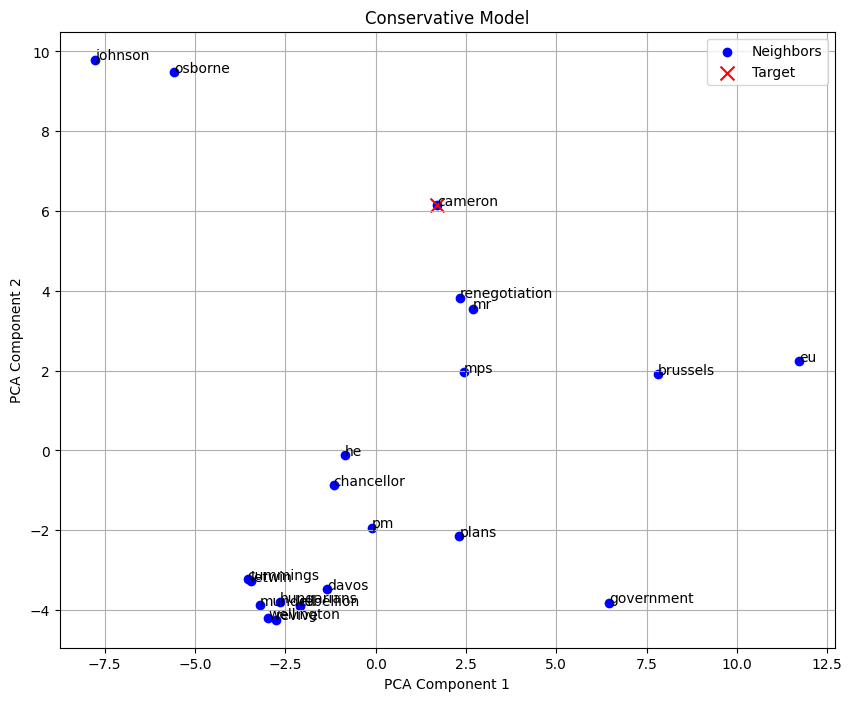

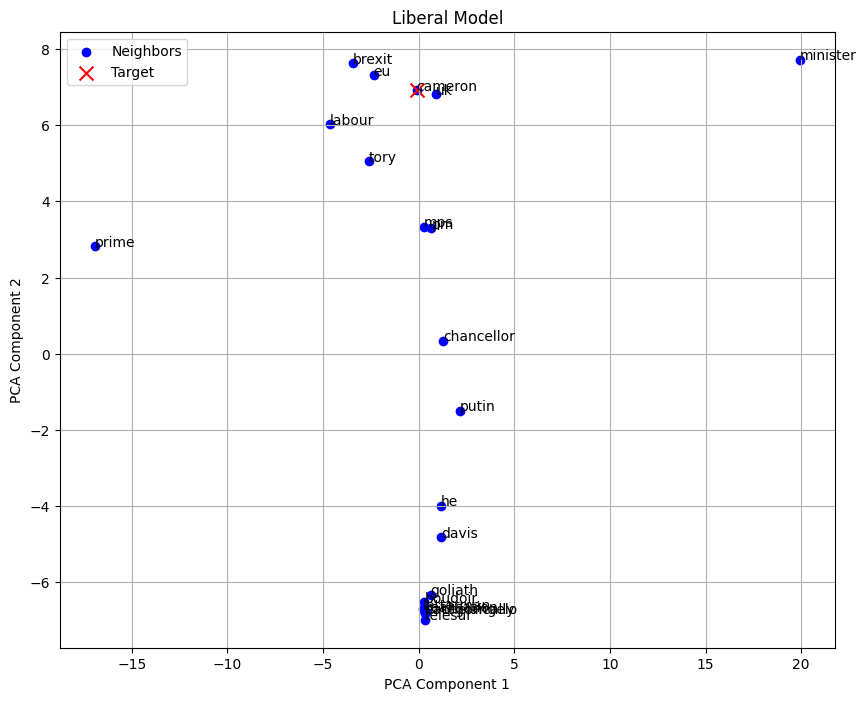

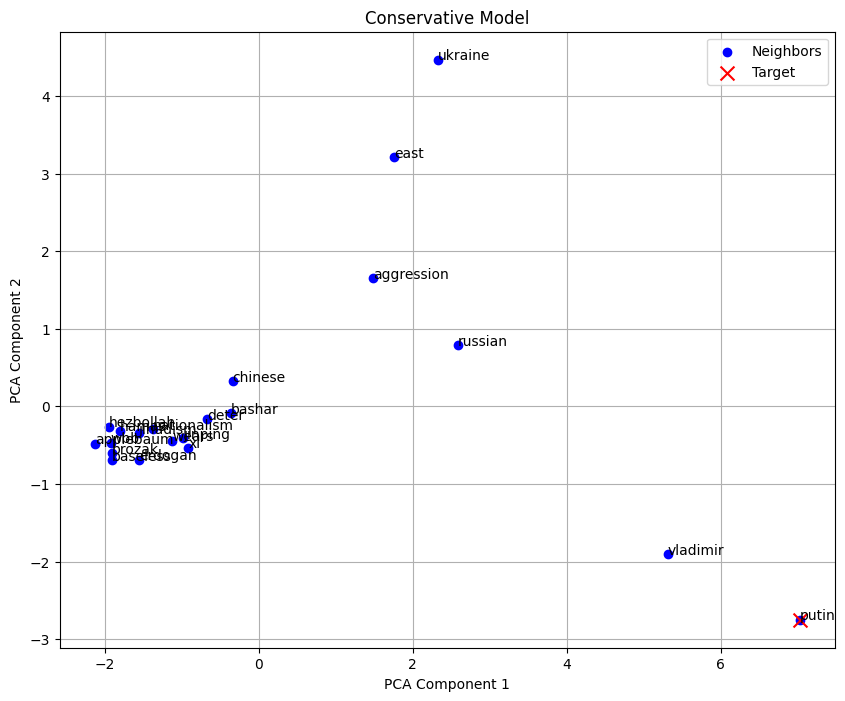

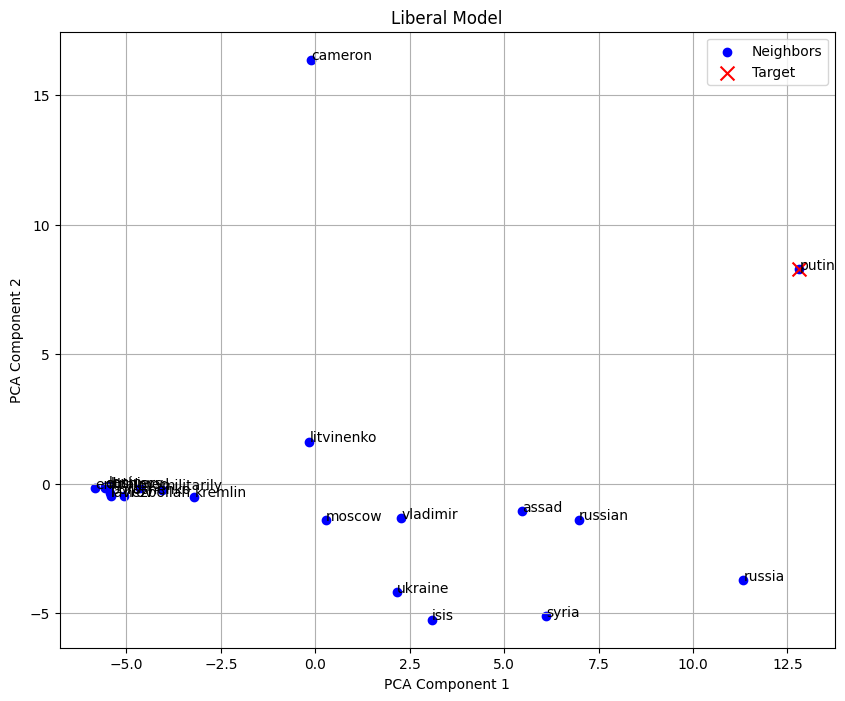

In [20]:
# Plot liberal and conservative neighbors for each person
for person in persons_l:
    visualize_neighbors_pca(con_model, {person: conservative_neighbors.get(person, [])}, "Conservative Model")
    visualize_neighbors_pca(lib_model, {person: liberal_neighbors.get(person, [])}, "Liberal Model")


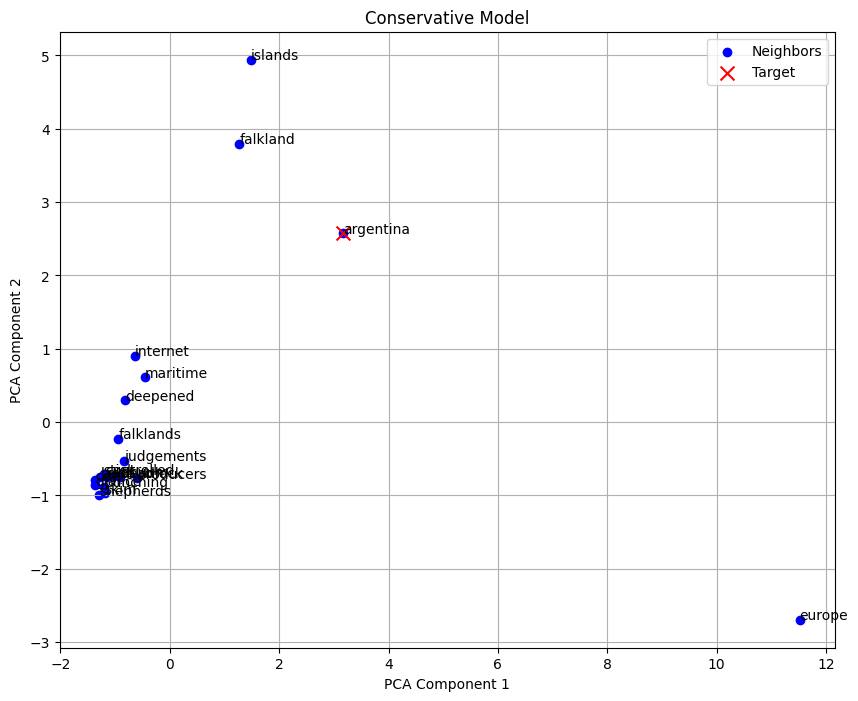

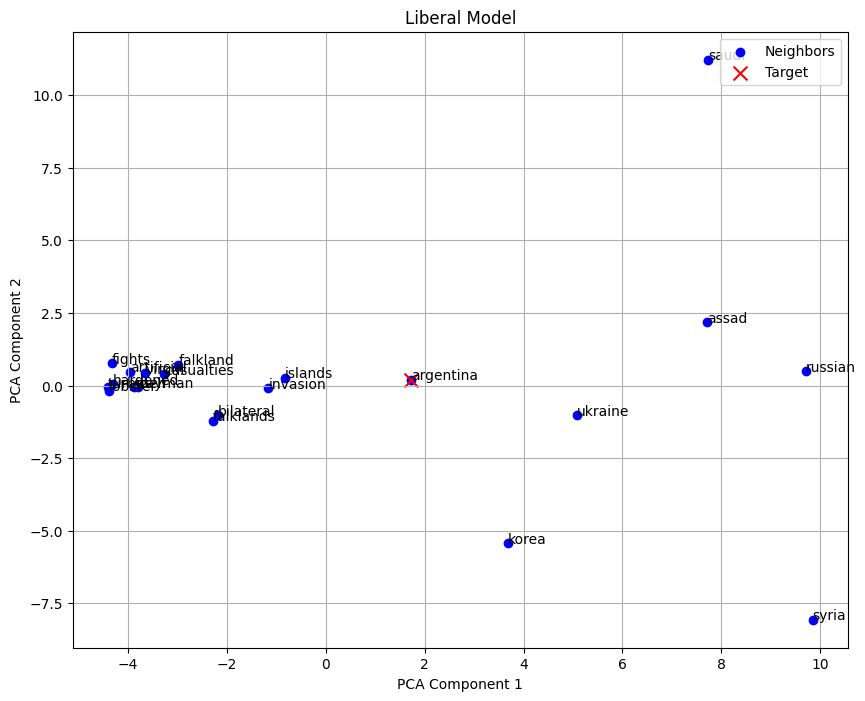

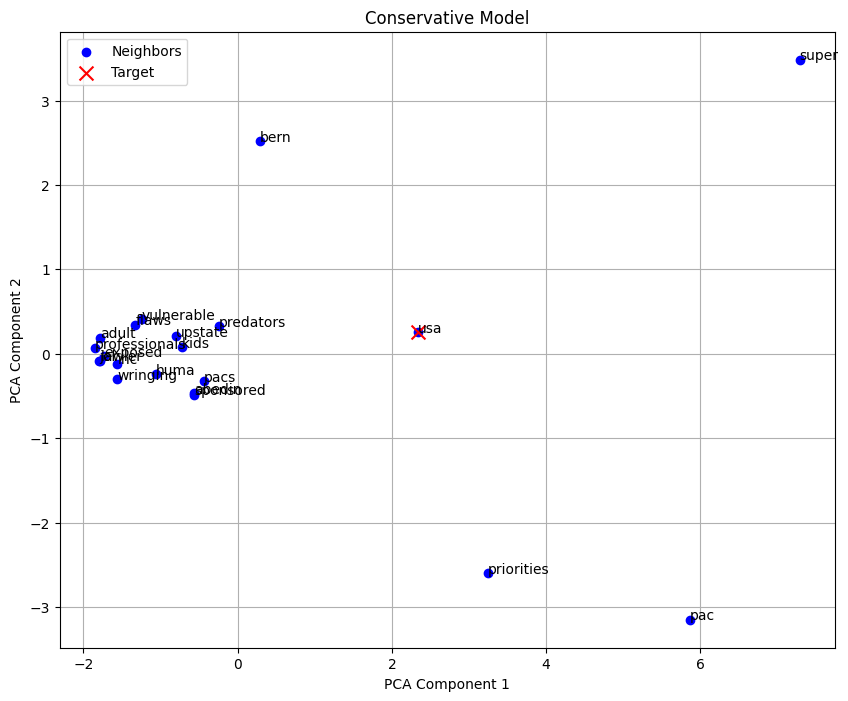

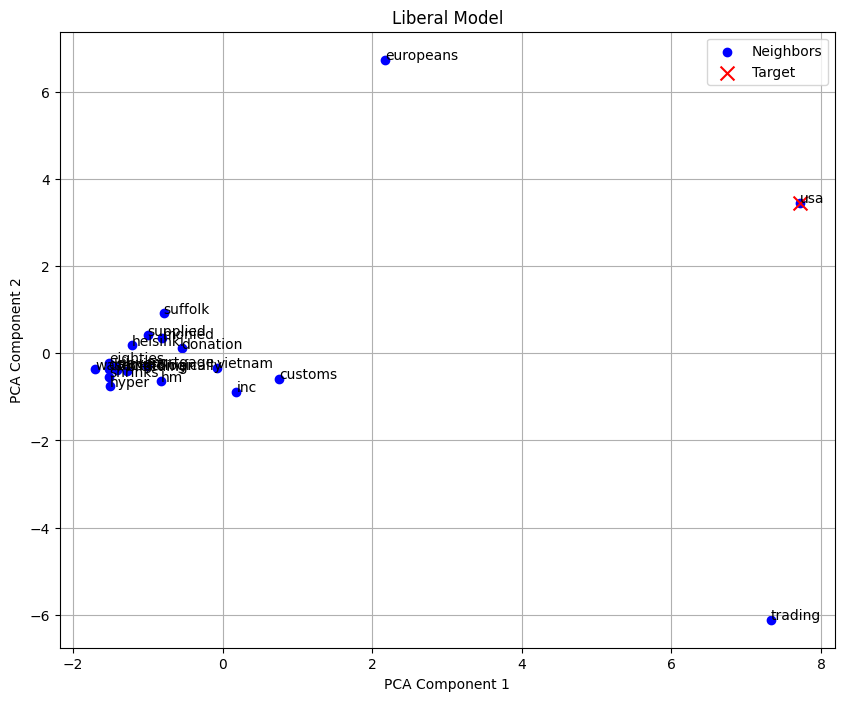

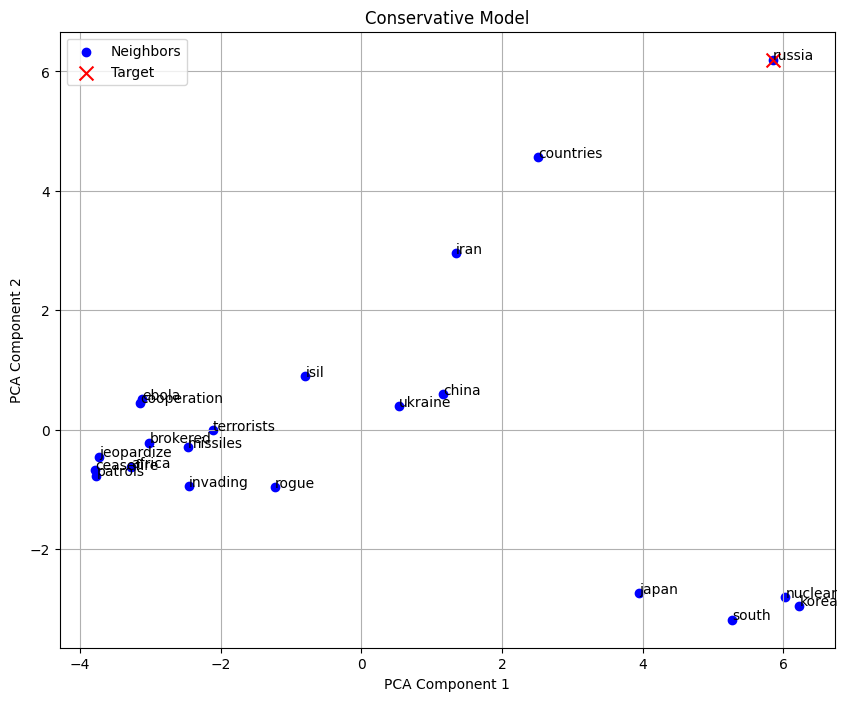

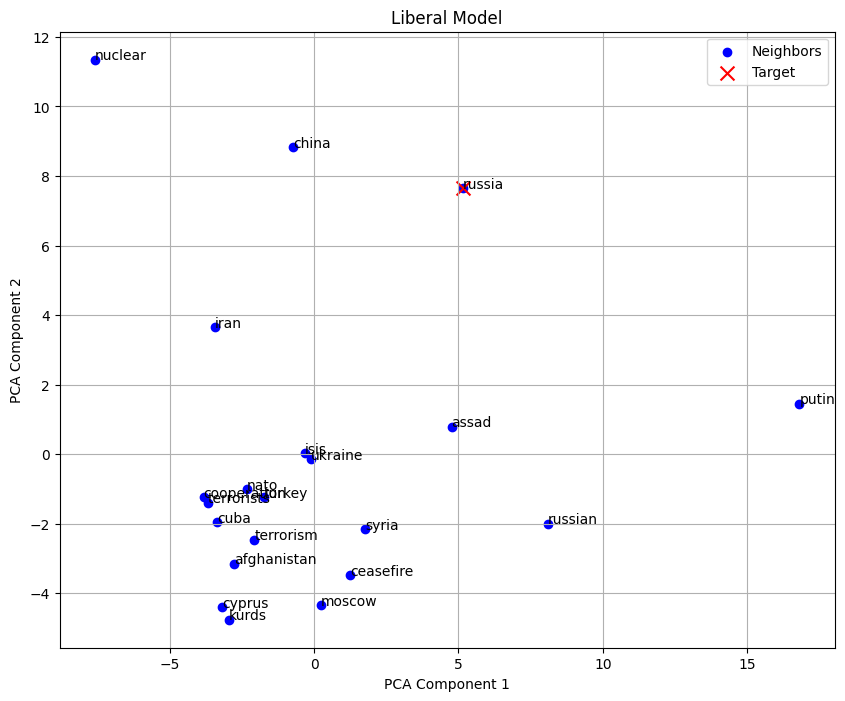

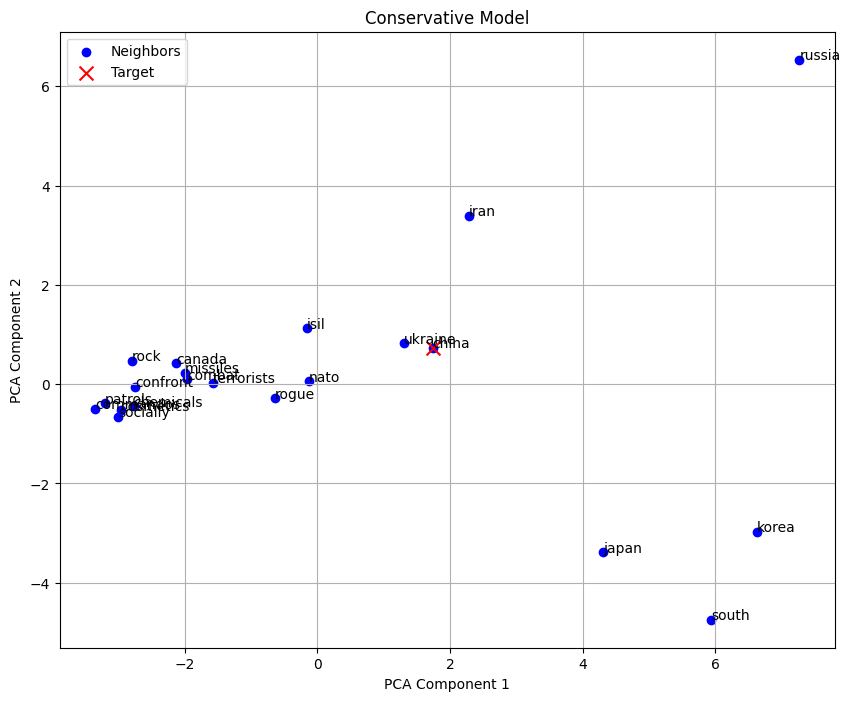

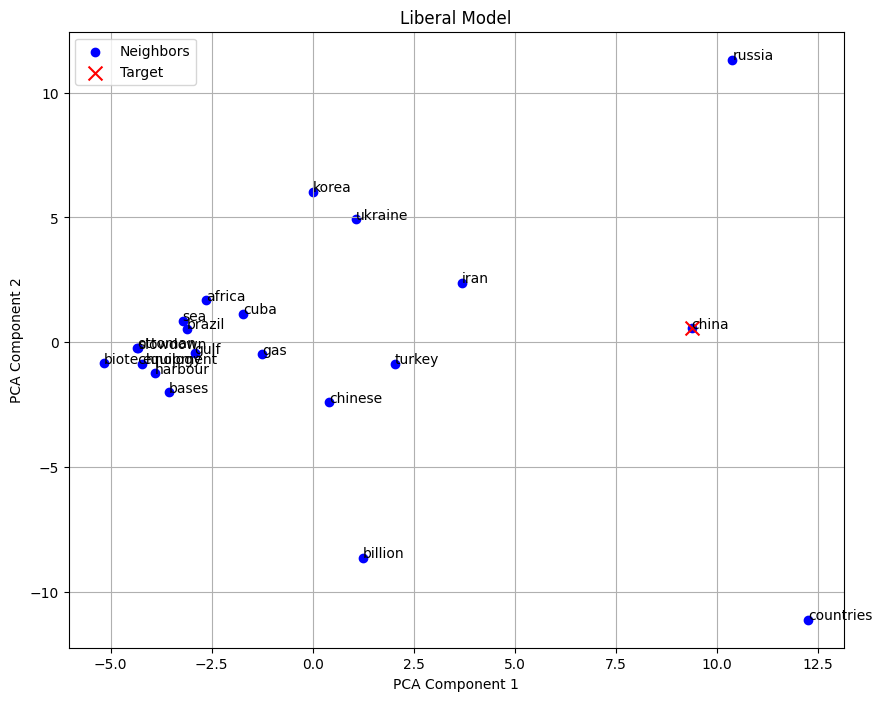

In [21]:
# Plot liberal and conservative neighbors for each country
for country in countries_l:
    visualize_neighbors_pca(con_model, {country: conservative_neighbors.get(country, [])}, "Conservative Model")
    visualize_neighbors_pca(lib_model, {country: liberal_neighbors.get(country, [])}, "Liberal Model")

**Interpret your findings:**

The model performs quite well at mapping relevant words together in general. However, from the words that are closest to the target word there is no real biased to interpret when comparing the conservative and the liberal models. 